<a href="https://colab.research.google.com/github/j-12/image-classification-fulhaus/blob/master/Image_classification_fulhaus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import pathlib

In [2]:
#set path for the data directory
data_dir = pathlib.Path('/content/drive/MyDrive/Datafortest/')

In [6]:
#checking number of images in our dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

300


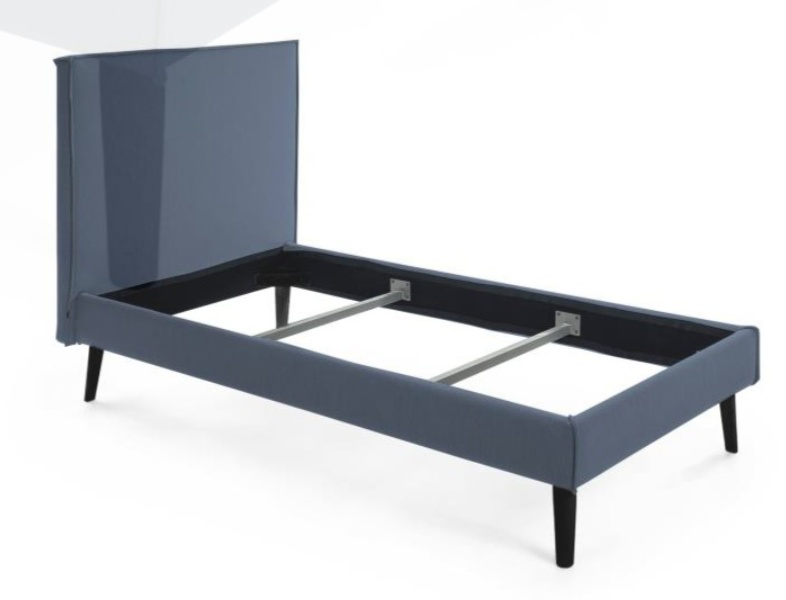

In [7]:
#checking one of the images from 'Bed' category
beds = list(data_dir.glob('Bed/*'))
PIL.Image.open(str(beds[0]))

In [8]:
print(beds[0])

/content/drive/MyDrive/Datafortest/Bed/Bed Venla 160 x 200 cm blue.jpg


In [9]:
#declaring parameters
batch_size = 32
img_height = 256
img_width = 256

In [10]:
#getting training dataset from directory, with split 0.8
from tensorflow.python.ops.gen_batch_ops import batch
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset = 'training', seed = 123,batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 240 files for training.


In [11]:
#getting validation dataset from directory, with split 0.2
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.2, subset = 'validation',seed = 123, batch_size = batch_size)
                                                     

Found 300 files belonging to 3 classes.
Using 60 files for validation.


In [12]:
#checking class names and order
class_names = train_ds.class_names
print(class_names)

['Bed', 'Chair', 'Sofa']


In [13]:
#to save time
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [14]:
#normalization layer
normalization_layer = layers.Rescaling(1./255)

In [15]:
#normalizing data and checking
normalized_ds = train_ds.map(lambda x,y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 1.0


In [16]:
num_classes = len(class_names)

In [20]:
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2), #changed to 2,2
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
#checking the model structure
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9

In [22]:
model1.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [23]:
epochs = 17
history1 = model1.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/17
8/8 [==============================] - 32s 4s/step - loss: 1.1023 - accuracy: 0.3708 - val_loss: 1.0590 - val_accuracy: 0.4000
Epoch 2/17
8/8 [==============================] - 20s 3s/step - loss: 0.9374 - accuracy: 0.5792 - val_loss: 0.5818 - val_accuracy: 0.8333
Epoch 3/17
8/8 [==============================] - 23s 3s/step - loss: 0.5190 - accuracy: 0.7667 - val_loss: 0.3557 - val_accuracy: 0.8833
Epoch 4/17
8/8 [==============================] - 20s 3s/step - loss: 0.5062 - accuracy: 0.7875 - val_loss: 0.3693 - val_accuracy: 0.8500
Epoch 5/17
8/8 [==============================] - 22s 3s/step - loss: 0.3839 - accuracy: 0.8500 - val_loss: 0.3164 - val_accuracy: 0.8667
Epoch 6/17
8/8 [==============================] - 22s 3s/step - loss: 0.2808 - accuracy: 0.8750 - val_loss: 0.2812 - val_accuracy: 0.9000
Epoch 7/17
8/8 [==============================] - 20s 3s/step - loss: 0.1876 - accuracy: 0.9292 - val_loss: 0.1970 - val_accuracy: 0.9167
Epoch 8/17
8/8 [==================

Text(0.5, 1.0, 'Training and Validation Loss')

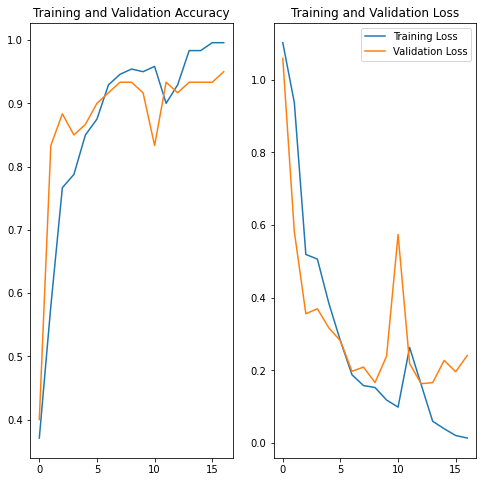

In [24]:
#plotting training and validation accuracy and loss for better understanding
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [28]:
#to predict and check results
bed_path = '/content/drive/MyDrive/Datafortest/Bed/aura.jpg'
img = keras.preprocessing.image.load_img(bed_path, target_size=(256,256))


In [29]:

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 113ms/step
This image most likely belongs to Chair with a 76.34 percent confidence.


In [27]:
model1.save("model1.hdf5")